Insight 1: "What is the correlation between Bitcoin and the S&P 500 during periods of economic crisis?"

Insight 2: "Does Bitcoin exhibits higher volatility compared to the S&P 500, especially in recent years?"

Insight 3: "The S&P 500 has more consistent returns, while Bitcoin shows extreme spikes, showing accumulated returns"

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')

btc_data['Date'] = pd.to_datetime(btc_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

In [29]:
# Rename the 'Close' columns for clarity
btc_data.rename(columns={"Close": "BTC_Price"}, inplace=True)
sp500_data.rename(columns={"Close": "SP500_Price"}, inplace=True)

# Merge the datasets based on the Date column
merged_data = pd.merge(btc_data[['Date', 'BTC_Price']], sp500_data[['Date', 'SP500_Price']], on="Date")

In [30]:
def analyze_period(data, start_date, end_date, title, line_color_BTC='orange', line_color_SP_500='blue'):
  """ 
  Parameters:
    - data: DataFrame with the combined data of BTC and S&P 500.
    - start_date: Start of the analysis period (str in 'YYYY-MM-DD' format).
    - end_date: End of the analysis period (str in 'YYYY-MM-DD' format).
    - title: Title for the charts.
    - line_color: Color for the Bitcoin line in the charts (str).
    
  Returns:
    - Calculated correlation (float).
  """
  # Filter data by date range
  period_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
  
  # Calculate Correlation
  correlation = period_data[['BTC_Price', 'SP500_Price']].corr().iloc[0, 1] # this use the Pearson correlation 
  print(f"The correlation between Bitcoin and S&P 500 during {title} is: {correlation:.4f}")
  
  # Set Graphic styles
  sns.set_theme(style='whitegrid')
  plt.figure(figsize=(14, 8))
  
  # Graphic for the temporal series
  plt.subplot(2, 1, 1)
  plt.plot(period_data['Date'], period_data['BTC_Price'], label='Bitcoin', color=line_color_BTC, alpha=0.8)
  plt.plot(period_data['Date'], period_data['SP500_Price'], label='S&P 500', color=line_color_SP_500, alpha=0.8)
  plt.title(f"Bitcoin vs S&P 500 Prices ({title})", fontsize=14)
  plt.ylabel('Price')
  plt.legend()
  plt.grid(True)
  
  # Scatter plot with regression line 
  plt.subplot(2, 1, 2)  
  sns.regplot(
    x='BTC_Price',
    y='SP500_Price',
    data=period_data,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red', 'alpha': 0.6}
  )
  plt.title(f"Correlation Between Bitcoin and S&P 500 ({title})", fontsize=14)
  plt.xlabel('Bitcoin Price')
  plt.ylabel('S&P 500 Price')
  
  # Adjust design and show
  plt.tight_layout()
  plt.show()
  
  return correlation
  

Insight 1: "What is the correlation between Bitcoin and the S&P 500 during periods of economic crisis? (2020-03 to 2021-12)"

The correlation between Bitcoin and S&P 500 during COVID-19 Crisis (2020-2021) is: 0.8727


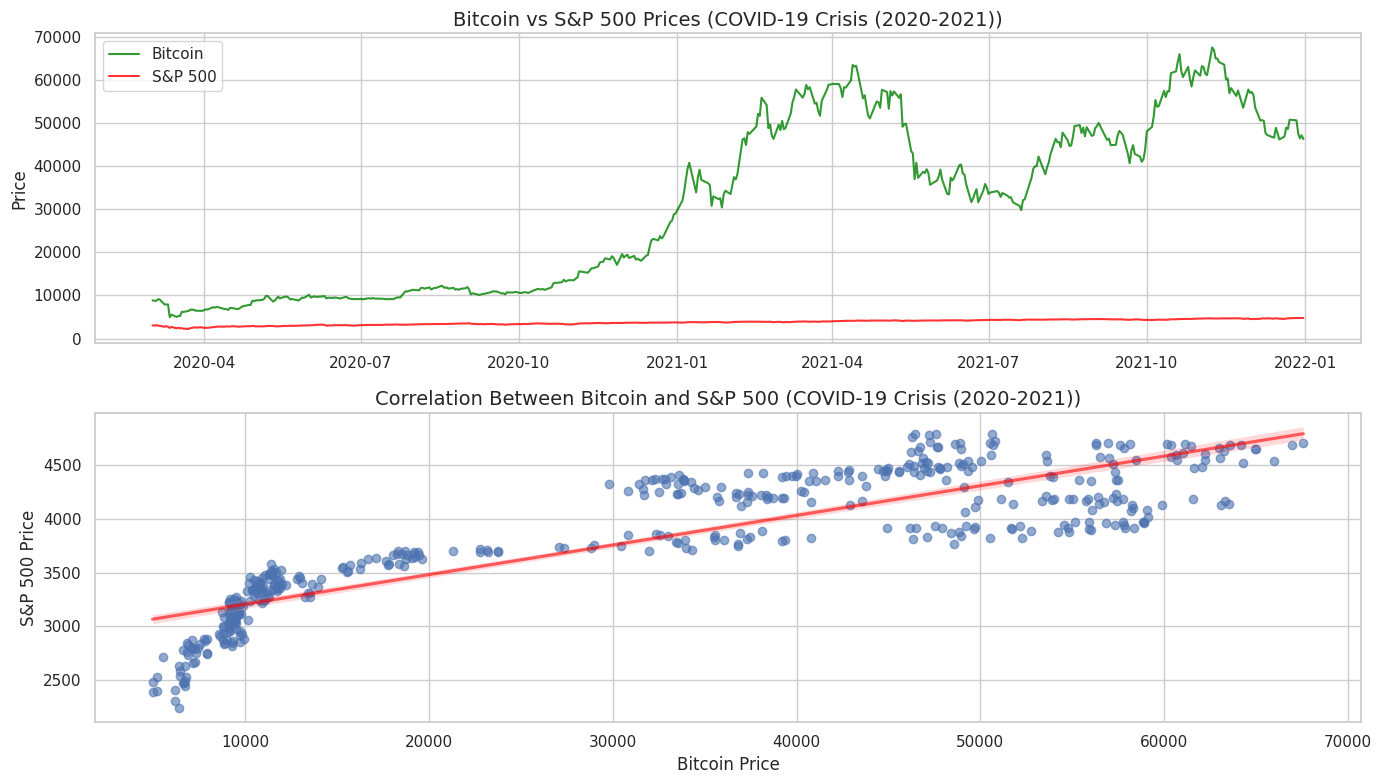

In [31]:
covid_correlation = analyze_period(
    merged_data, 
    '2020-03-01', 
    '2021-12-31', 
    'COVID-19 Crisis (2020-2021)', 
    line_color_BTC='green',
    line_color_SP_500='red'
)

Correlation with BTC and S&P 500 during Supply and energy Crisis 2021-2022 (Still covid issues and Ukraine-Russia War)

The correlation between Bitcoin and S&P 500 during Supply and Energy Crisis (2021-2022) is: 0.6018


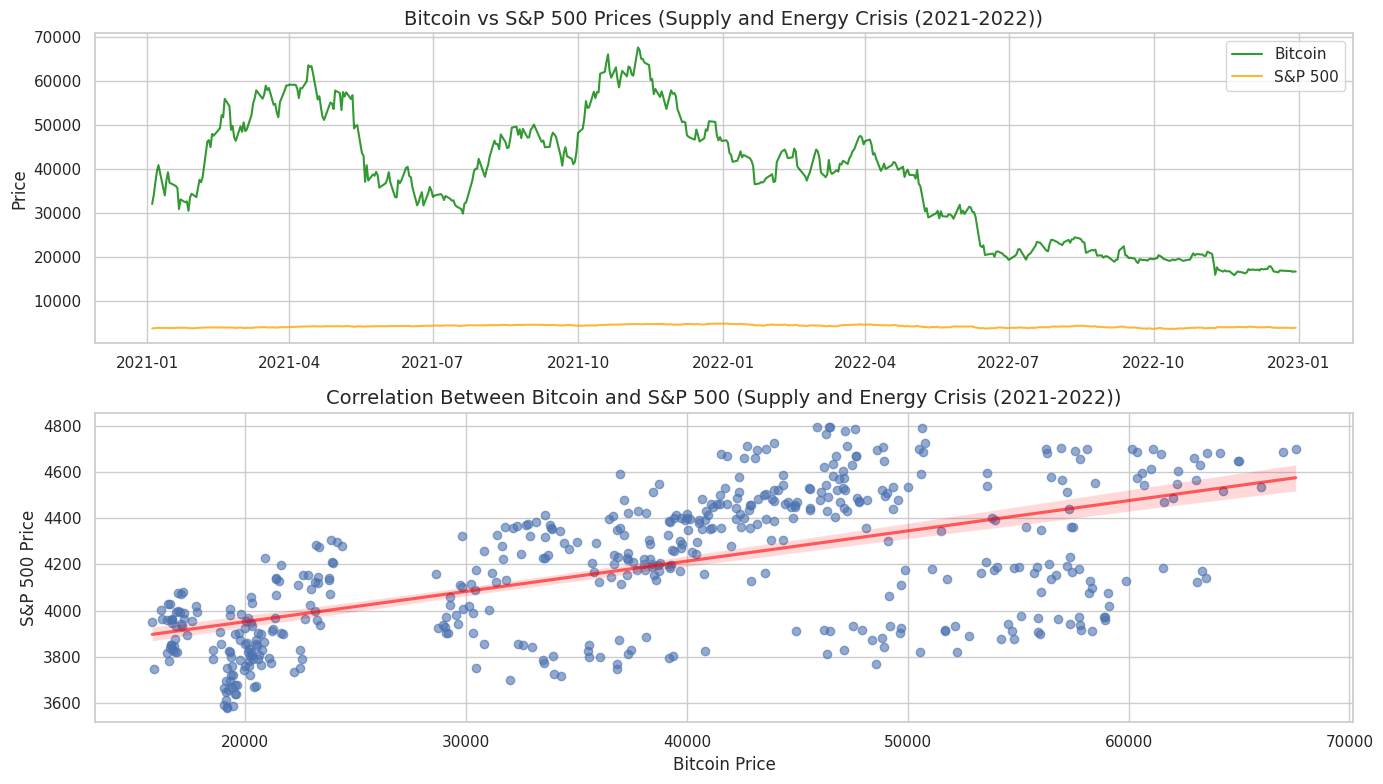

In [40]:
supply_crisis_correlation = analyze_period(
    merged_data, 
    '2021-01-01', 
    '2022-12-31', 
    'Supply and Energy Crisis (2021-2022)', 
    line_color_BTC='green',
    line_color_SP_500='orange'
)

Correlation with BTC and S&P 500, economic crisis 2023-2024

The correlation between Bitcoin and S&P 500 during Economic Crisis (2023-2024) is: 0.9076


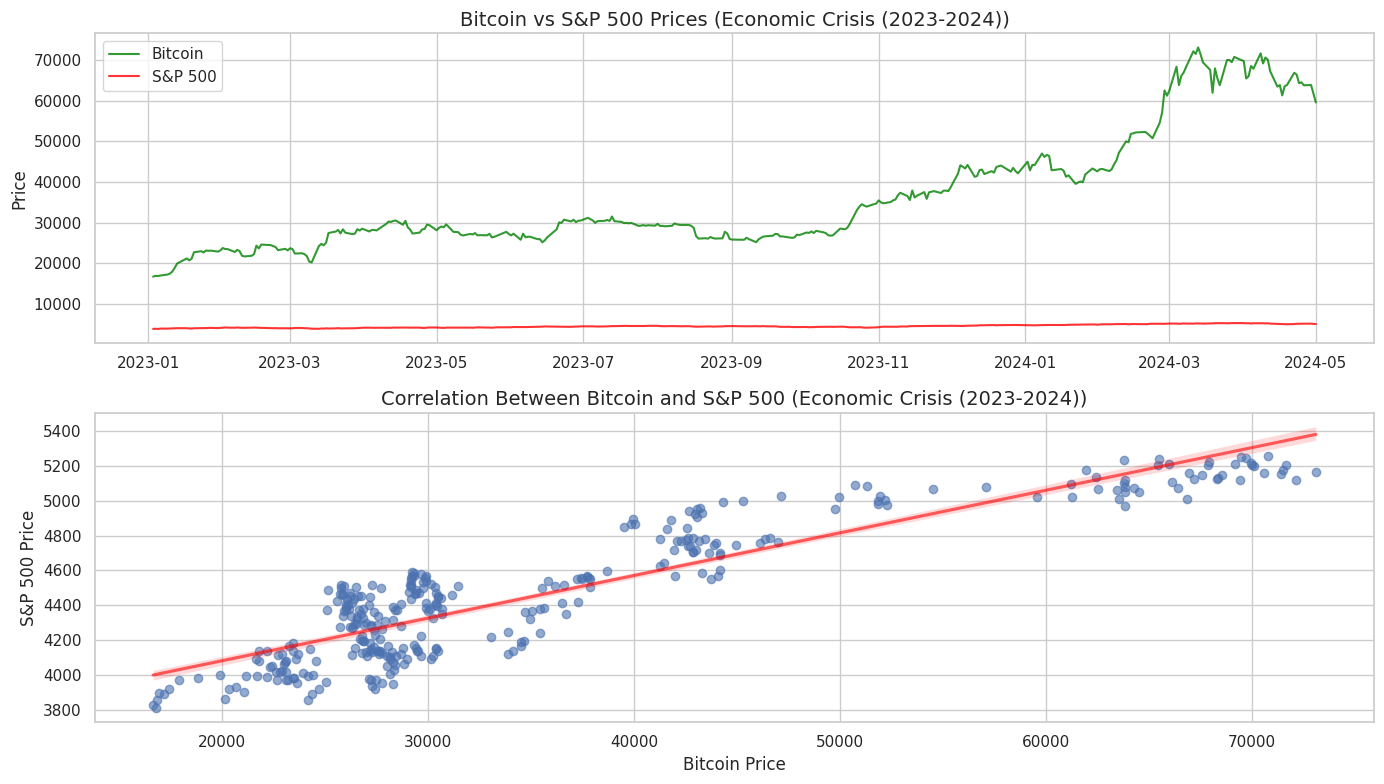

In [42]:
economic_crisis_correlation = analyze_period(
    merged_data, 
    '2023-01-01', 
    '2024-05-01', 
    'Economic Crisis (2023-2024)',
    line_color_BTC='green',
    line_color_SP_500='red'
)

Table of correlations between the different periods of time

In [44]:
results = pd.DataFrame({
    'Period': ['COVID-19 Crisis', 'Supply and Energy Crisis', 'Economic Crisis'],
    'Correlation': [covid_correlation, supply_crisis_correlation, economic_crisis_correlation]
})
print(results)


                     Period  Correlation
0           COVID-19 Crisis     0.872746
1  Supply and Energy Crisis     0.601778
2           Economic Crisis     0.907637
